# Preparing Dataset


In [12]:
# INF2178 Assignment 1

# Library imports
import pandas as pd
import numpy as np
from sklearn import datasets
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Read input file
file_path = '/content/INF2178_A1_data.xlsx'
df = pd.read_excel(file_path)

In [27]:
# Create an output file for visualizations
import matplotlib.backends.backend_pdf as pdf_backend
pdf_filename = 'output_report.pdf'
pdf_pages = pdf_backend.PdfPages(pdf_filename)

In [16]:
# Display information on dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [6]:
# Display initial rows of dataset
print(df.head(10))

  OCCUPANCY_DATE                        ORGANIZATION_NAME  PROGRAM_ID  \
0     2021-01-01                 COSTI Immigrant Services       15371   
1     2021-01-01                 COSTI Immigrant Services       16211   
2     2021-01-01                 COSTI Immigrant Services       16192   
3     2021-01-01                 COSTI Immigrant Services       16191   
4     2021-01-01                 COSTI Immigrant Services       16193   
5     2021-01-01                 COSTI Immigrant Services       12251   
6     2021-01-01                 COSTI Immigrant Services       15372   
7     2021-01-01                 COSTI Immigrant Services       13751   
8     2021-01-01  Christie Ossington Neighbourhood Centre       16111   
9     2021-01-01  Christie Ossington Neighbourhood Centre       15711   

                                        PROGRAM_NAME       SECTOR  \
0       COSTI North York West Hotel - Family Program     Families   
1      COSTI North York West Hotel - Seniors Program  Mixe

In [14]:
# Create continuous variables on shelter occupancy rates
df['OCCUPANCY_RATE_BEDS'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
df['OCCUPANCY_RATE_ROOMS'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']

# Summary Statistics

In [8]:
# Function for summary statistics
def get_summary_statistics(dataset, label='Dataset'):

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print(f'{label} Summary Statistics:')
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('\n\n')

In [9]:
# Select relevant data columns
selected_data = df[['PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS',
                    'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS', 'OCCUPANCY_RATE_BEDS', 'OCCUPANCY_RATE_ROOMS' ]].copy()

# Fill missing values with the mean of the column
selected_data.fillna(selected_data.mean(numeric_only=True), inplace=True)

In [10]:
# Display summary statistics for relevant columns
get_summary_statistics(selected_data['SERVICE_USER_COUNT'], label='Service User Count')
get_summary_statistics(selected_data['CAPACITY_ACTUAL_BED'], label='Capacity Actual Bed')
get_summary_statistics(selected_data['OCCUPIED_BEDS'], label='Occupied Beds')
get_summary_statistics(selected_data['CAPACITY_ACTUAL_ROOM'], label='Capacity Actual Room')
get_summary_statistics(selected_data['OCCUPIED_ROOMS'], label='Occupied Rooms')
get_summary_statistics(selected_data['OCCUPANCY_RATE_BEDS'], label='Occupancy Rate for Beds')
get_summary_statistics(selected_data['OCCUPANCY_RATE_ROOMS'], label='Occupancy Rate for Rooms')

Service User Count Summary Statistics:
Min: 1
Mean: 45.73
Max: 339
25th percentile: 15.0
Median: 28.0
75th percentile: 51.0
Interquartile range (IQR): 36.0



Capacity Actual Bed Summary Statistics:
Min: 1.0
Mean: 31.63
Max: 234.0
25th percentile: 21.0
Median: 31.63
75th percentile: 31.63
Interquartile range (IQR): 10.63



Occupied Beds Summary Statistics:
Min: 1.0
Mean: 29.78
Max: 234.0
25th percentile: 19.0
Median: 29.78
75th percentile: 29.78
Interquartile range (IQR): 10.78



Capacity Actual Room Summary Statistics:
Min: 1.0
Mean: 55.55
Max: 268.0
25th percentile: 55.55
Median: 55.55
75th percentile: 55.55
Interquartile range (IQR): 0.0



Occupied Rooms Summary Statistics:
Min: 1.0
Mean: 52.8
Max: 268.0
25th percentile: 52.8
Median: 52.8
75th percentile: 52.8
Interquartile range (IQR): 0.0



Occupancy Rate for Beds Summary Statistics:
Min: 0.02
Mean: 0.93
Max: 1.0
25th percentile: 0.93
Median: 0.93
75th percentile: 1.0
Interquartile range (IQR): 0.07



Occupancy Rate for Rooms

# Quantitative analysis using t-tests

In [22]:
# Two sample t-test
from scipy.stats import ttest_ind

# Separate data based on program models (emergency and transitional)
emergency_data = df[df['PROGRAM_MODEL'] == 'Emergency']
transitional_data = df[df['PROGRAM_MODEL'] == 'Transitional']

# Calculate means for Occupancy Rate (Beds)
mean_emergency_beds = emergency_data['OCCUPANCY_RATE_BEDS'].mean()
mean_transitional_beds = transitional_data['OCCUPANCY_RATE_BEDS'].mean()

# Calculate means for Occupancy Rate (Rooms)
mean_emergency_rooms = emergency_data['OCCUPANCY_RATE_ROOMS'].mean()
mean_transitional_rooms = transitional_data['OCCUPANCY_RATE_ROOMS'].mean()

# Print means for Occupancy Rate (Rooms)
print(f"Mean Occupancy Rates (Beds) for Emergency: {mean_emergency_beds}")
print(f"Mean Occupancy Rates (Beds) for Transitional: {mean_transitional_beds}")
print(f"Mean Occupancy Rates (Rooms) for Emergency: {mean_emergency_rooms}")
print(f"Mean Occupancy Rates (Rooms) for Transitional: {mean_transitional_rooms}")

# Perform t-test for Occupancy Rate (Beds)
t_stat_bed, p_value_bed = ttest_ind(emergency_data['OCCUPANCY_RATE_BEDS'].dropna(), transitional_data['OCCUPANCY_RATE_BEDS'].dropna(), equal_var=False)

# Perform t-test for Occupancy Rate (Rooms)
t_stat_room, p_value_room = ttest_ind(emergency_data['OCCUPANCY_RATE_ROOMS'].dropna(), transitional_data['OCCUPANCY_RATE_ROOMS'].dropna(), equal_var=False)

# Print t-test results for Occupancy Rate (Beds)
print(f"T-statistic for Occupancy Rates (Beds): {t_stat_bed}")
print(f"P-value for Occupancy Rates (Beds): {p_value_bed}")

# Print t-test results for Occupancy Rate (Rooms)
print(f"T-statistic for Occupancy Rates (Rooms): {t_stat_room}")
print(f"P-value for Occupancy Rates (Rooms): {p_value_room}")

# Interpret t-test results
alpha = 0.05
if p_value_bed < alpha:
    print("Reject the null hypothesis for Occupancy Rates (Beds): there is a significant difference between program models.")
else:
    print("Fail to reject the null hypothesis for Occupancy Rates (Beds): there is no significant difference between program models.")

if p_value_room < alpha:
    print("Reject the null hypothesis for Occupancy Rates (Rooms): there is a significant difference between program models.")
else:
    print("Fail to reject the null hypothesis for Occupancy Rates (Rooms): there is no significant difference between program models.")


Mean Occupancy Rates (Beds) for Emergency: 0.943500571658339
Mean Occupancy Rates (Beds) for Transitional: 0.8851944654528656
Mean Occupancy Rates (Rooms) for Emergency: 0.9386299840456679
Mean Occupancy Rates (Rooms) for Transitional: 0.8232070500372471
T-statistic for Occupancy Rates (Beds): 36.78483679745313
P-value for Occupancy Rates (Beds): 7.273950955976339e-283
T-statistic for Occupancy Rates (Rooms): 31.71080126309493
P-value for Occupancy Rates (Rooms): 4.4252019739840735e-150
Reject the null hypothesis for Occupancy Rates (Beds): there is a significant difference between program models.
Reject the null hypothesis for Occupancy Rates (Rooms): there is a significant difference between program models.


In [30]:
# Welch's t-test
x = emergency_data['OCCUPANCY_RATE_BEDS'].dropna()
y = transitional_data['OCCUPANCY_RATE_BEDS'].dropna()

# Using SciPy Package for Welch's t-test
t_stat, p_val = stats.ttest_ind(x, y, equal_var=False)
print("Welch's t-statistic =", t_stat)
print("p-value =", p_val)

Welch's t-statistic = 36.78483679745313
p-value = 7.273950955976339e-283


In [31]:
# Two sample t-test

# Calculate mean service user count for 'Emergency' program model
mean_service_user_count_emergency = emergency_data['SERVICE_USER_COUNT'].mean()
print(f"Mean Service User Count (Emergency): {mean_service_user_count_emergency}")

# Calculate mean service user count for 'Transitional' program model
mean_service_user_count_transitional = transitional_data['SERVICE_USER_COUNT'].mean()
print(f"Mean Service User Count (Transitional): {mean_service_user_count_transitional}")

# Perform t-test for Service User Count between 'Emergency' and 'Transitional' program models
t_stat_service_user_count, p_value_service_user_count = ttest_ind(emergency_data['SERVICE_USER_COUNT'].dropna(), transitional_data['SERVICE_USER_COUNT'].dropna(), equal_var=False)

# Print the results for Service User Count  between 'Emergency' and 'Transitional' program models
print(f"T-statistic for Service User Count: {t_stat_service_user_count}")
print(f"P-value for Service User Count: {p_value_service_user_count}")

# Interpret the result for Service User Count between 'Emergency' and 'Transitional' program models
alpha = 0.05
if p_value_service_user_count < alpha:
    print("Reject the null hypothesis: there is a significant difference in the mean of Service User Count  between 'Emergency' and 'Transitional' program models.")
else:
    print("Fail to reject the null hypothesis: there is no significant difference in the mean of Service User Count between 'Emergency' and 'Transitional' program models.")


Mean Service User Count (Emergency): 49.06422570472545
Mean Service User Count (Transitional): 30.988724603765558
T-statistic for Service User Count: 38.85174699254652
P-value for Service User Count: 0.0
Reject the null hypothesis: there is a significant difference in the mean of Service User Count  between 'Emergency' and 'Transitional' program models.


# Exploratory Data Analysis (EDA)

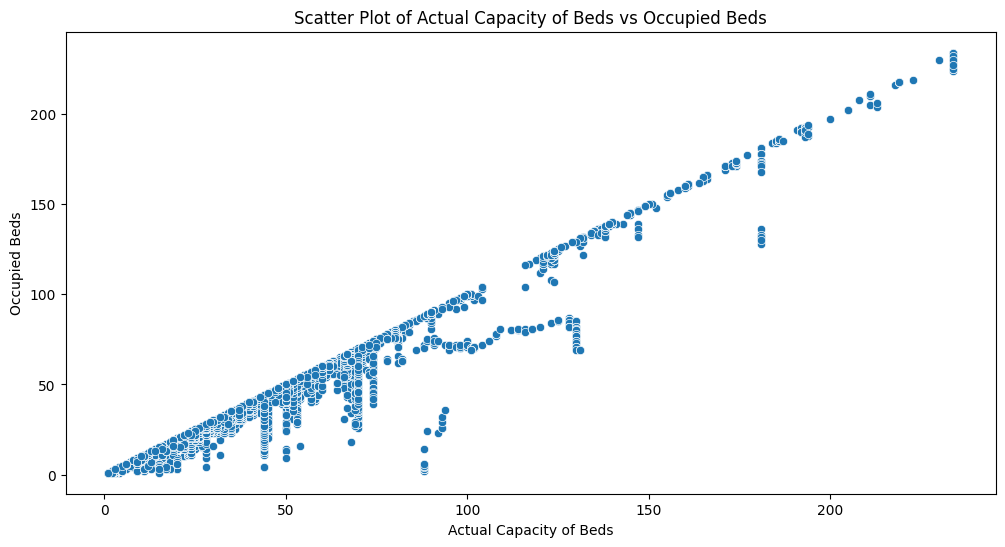

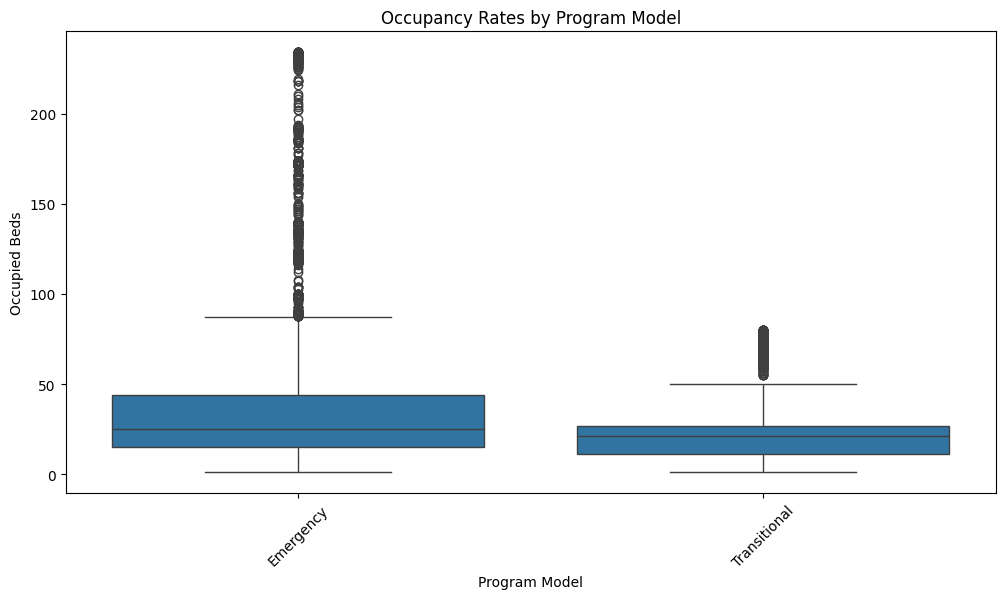

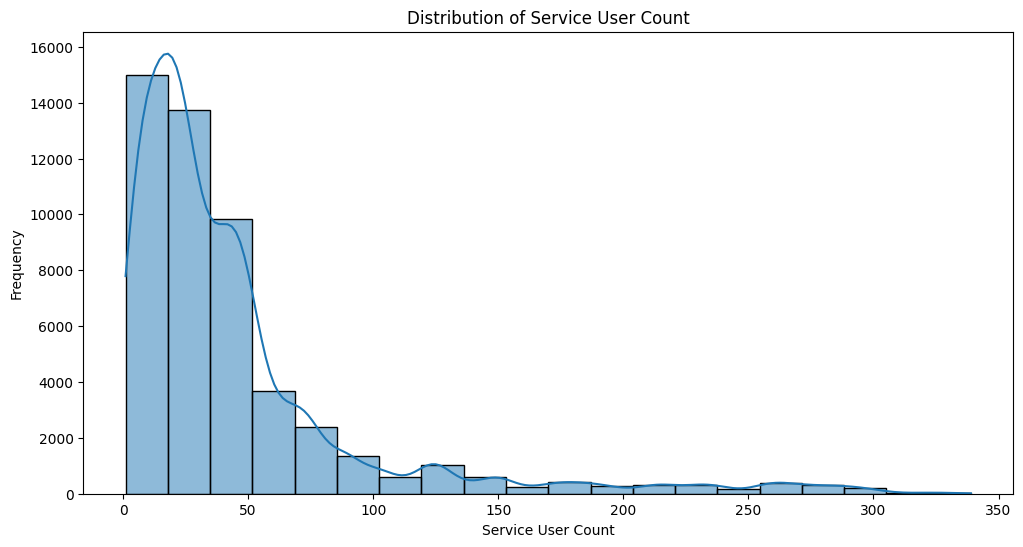

<ipython-input-28-d3f704f0e229>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPIED_BEDS', data=df, ci=None)


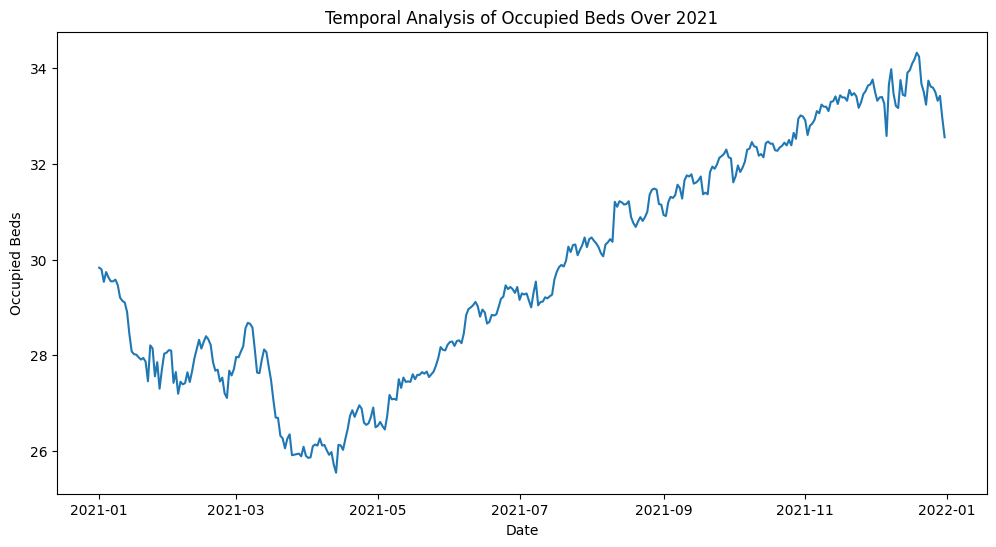

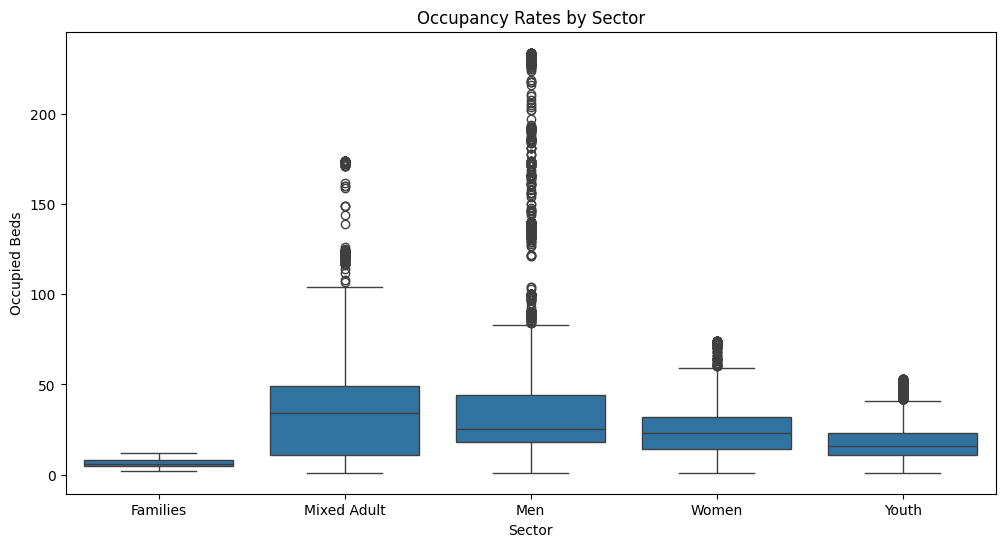

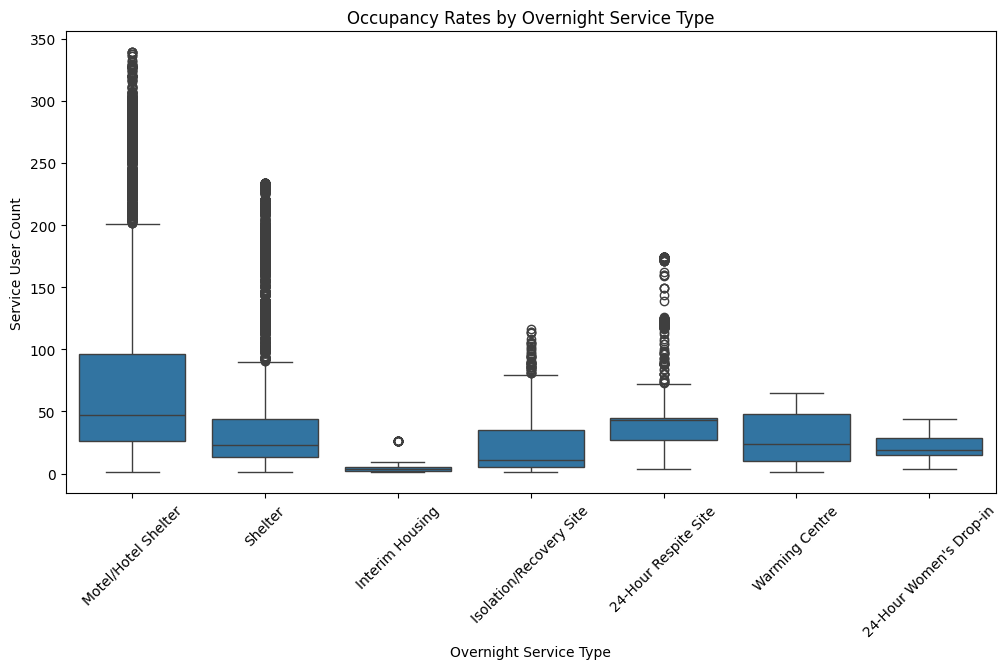

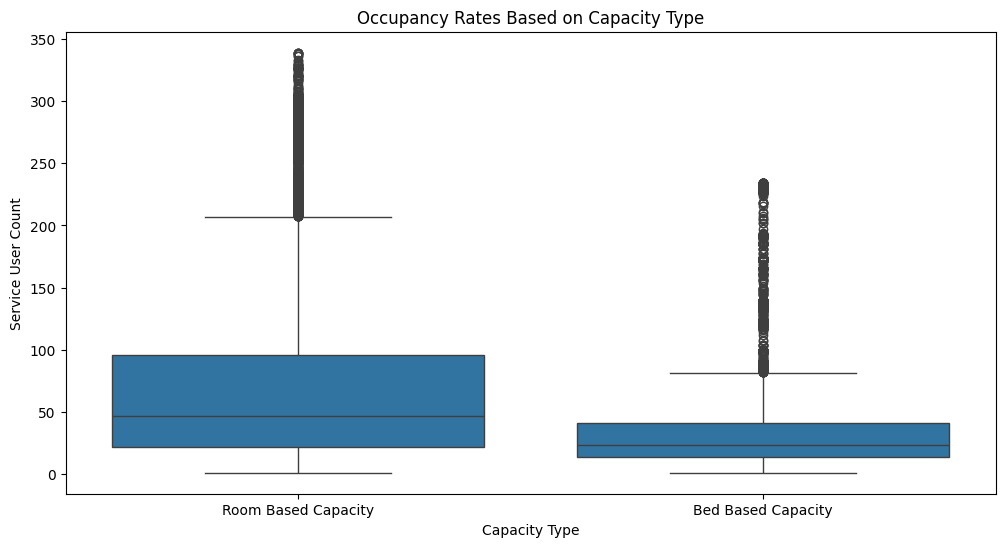

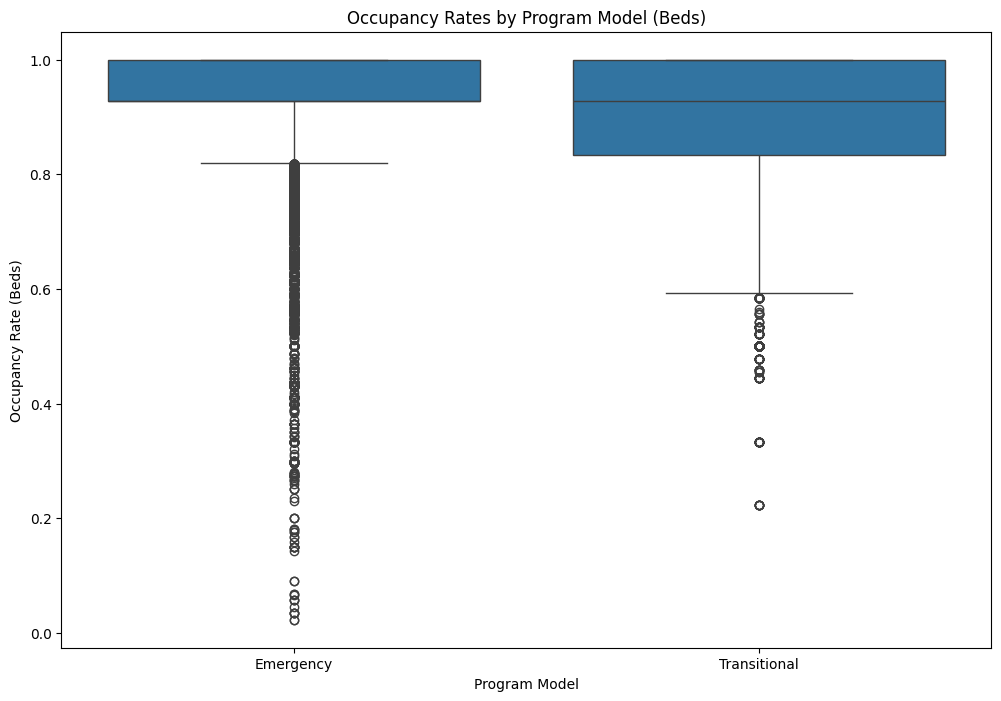

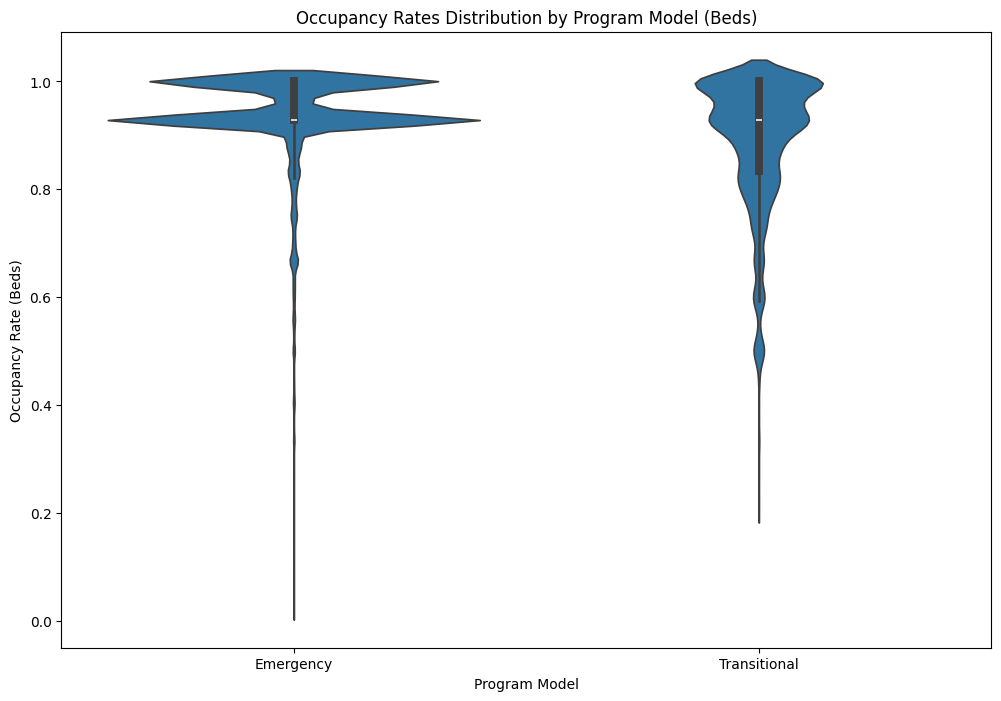

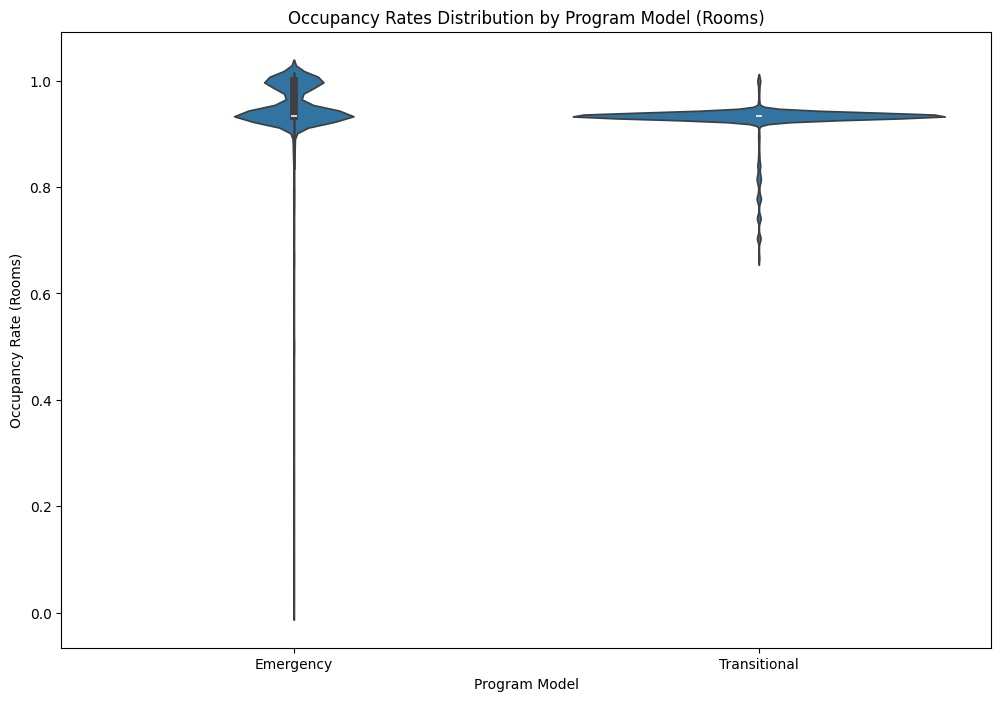

<ipython-input-28-d3f704f0e229>:99: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data[['PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS','CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS', 'OCCUPANCY_RATE_BEDS', 'OCCUPANCY_RATE_ROOMS' ]].corr()


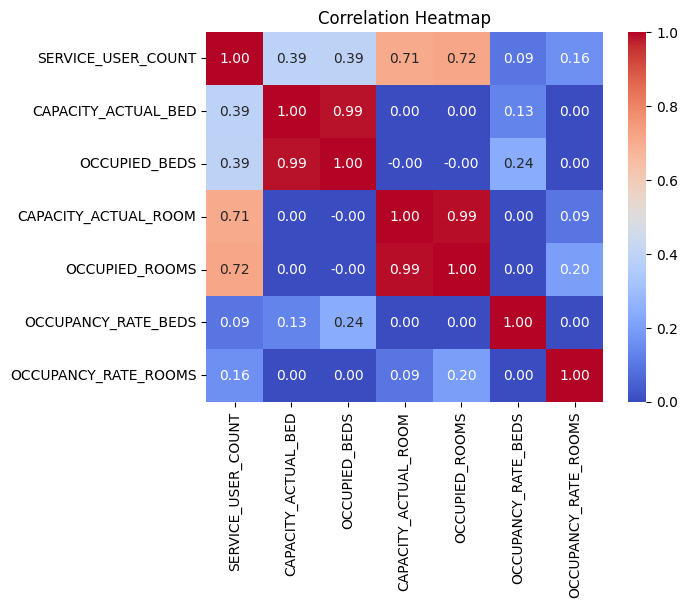

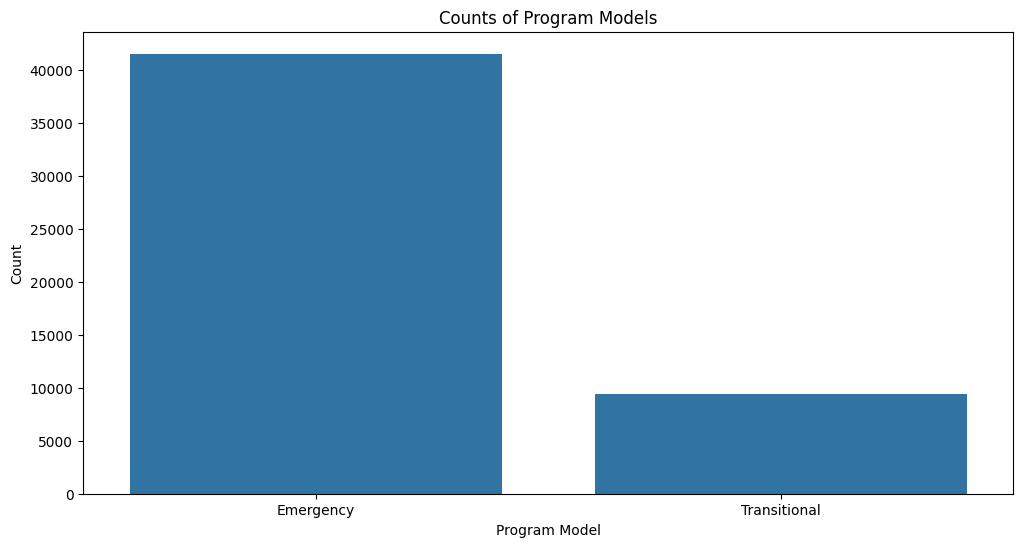

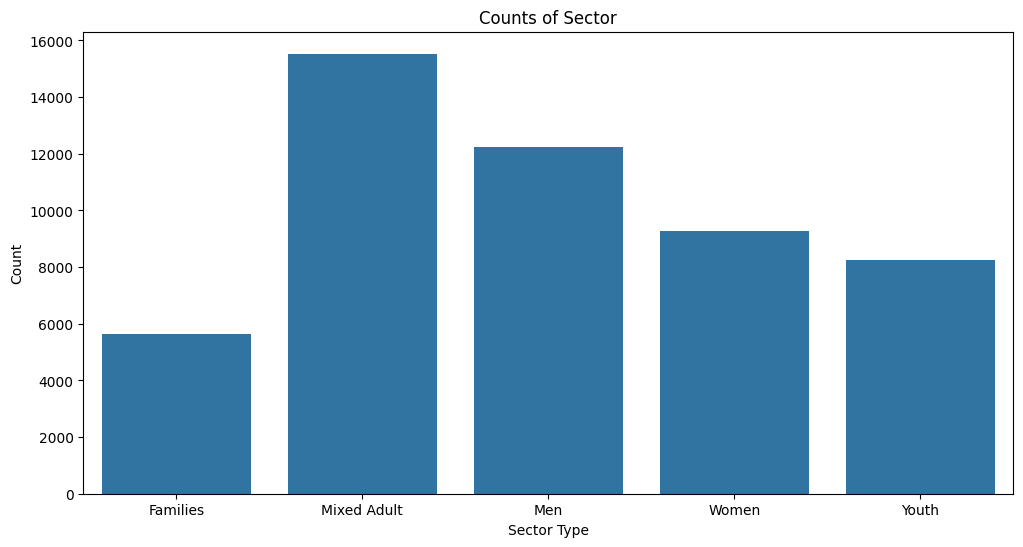

In [28]:
# Exploratory Data Analysis (EDA)

# Scatter Plot of Actual Capacity vs Occupied Beds
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CAPACITY_ACTUAL_BED', y='OCCUPIED_BEDS', data=df)
plt.title('Scatter Plot of Actual Capacity of Beds vs Occupied Beds')
plt.xlabel('Actual Capacity of Beds')
plt.ylabel('Occupied Beds')
pdf_pages.savefig()
plt.show()

# Boxplot for Program Model analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPIED_BEDS', data=df)
plt.title('Occupancy Rates by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Occupied Beds')
plt.xticks(rotation=45)
pdf_pages.savefig()
plt.show()

# Histogram for Service User Count distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['SERVICE_USER_COUNT'], bins=20, kde=True)
plt.title('Distribution of Service User Count')
plt.xlabel('Service User Count')
plt.ylabel('Frequency')
pdf_pages.savefig()
plt.show()

# Temporal Analysis
df['OCCUPANCY_DATE'] = pd.to_datetime(df['OCCUPANCY_DATE'])

# Line Plot for temporal analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPIED_BEDS', data=df, ci=None)
plt.title('Temporal Analysis of Occupied Beds Over 2021')
plt.xlabel('Date')
plt.ylabel('Occupied Beds')
pdf_pages.savefig()
plt.show()

# Boxplot for Sector analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='SECTOR', y='OCCUPIED_BEDS', data=df)
plt.title('Occupancy Rates by Sector')
plt.xlabel('Sector')
plt.ylabel('Occupied Beds')
pdf_pages.savefig()
plt.show()

# Boxplot for Overnight Service Type analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='OVERNIGHT_SERVICE_TYPE', y='SERVICE_USER_COUNT', data=df)
plt.title('Occupancy Rates by Overnight Service Type')
plt.xlabel('Overnight Service Type')
plt.ylabel('Service User Count')
plt.xticks(rotation=45)
pdf_pages.savefig()
plt.show()

# Boxplot for Capacity Type analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', data=df)
plt.title('Occupancy Rates Based on Capacity Type')
plt.xlabel('Capacity Type')
plt.ylabel('Service User Count')
pdf_pages.savefig()
plt.show()

# Boxplot for Program Model analysis (Beds)
plt.figure(figsize=(12, 8))
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE_BEDS', data=selected_data)
plt.title('Occupancy Rates by Program Model (Beds)')
plt.xlabel('Program Model')
plt.ylabel('Occupancy Rate (Beds)')
pdf_pages.savefig()
plt.show()

# Violinplot for Occupancy Rate distribution (Beds)
plt.figure(figsize=(12, 8))
sns.violinplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE_BEDS', data=selected_data)
plt.title('Occupancy Rates Distribution by Program Model (Beds)')
plt.xlabel('Program Model')
plt.ylabel('Occupancy Rate (Beds)')
pdf_pages.savefig()
plt.show()

# Violionplot for Occupancy Rate distribution (Rooms)
plt.figure(figsize=(12, 8))
sns.violinplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE_ROOMS', data=selected_data)
plt.title('Occupancy Rates Distribution by Program Model (Rooms)')
plt.xlabel('Program Model')
plt.ylabel('Occupancy Rate (Rooms)')
pdf_pages.savefig()
plt.show()

# Correlation Matrix for selected data
correlation_matrix = selected_data[['PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS','CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS', 'OCCUPANCY_RATE_BEDS', 'OCCUPANCY_RATE_ROOMS' ]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
pdf_pages.savefig()
plt.show()

# Barplot for Program Model count
plt.figure(figsize=(12, 6))
sns.countplot(x='PROGRAM_MODEL', data=selected_data)
plt.title('Counts of Program Models')
plt.xlabel('Program Model')
plt.ylabel('Count')
pdf_pages.savefig()
plt.show()

# Barplot for Sector count
plt.figure(figsize=(12, 6))
sns.countplot(x='SECTOR', data=df)
plt.title('Counts of Sector')
plt.xlabel('Sector Type')
plt.ylabel('Count')
pdf_pages.savefig()
plt.show()


In [29]:
# Close pdf file

pdf_pages.close()